In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, plot_roc_curve, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from ipynb.fs.full.ClassifierHelperCode import eval_metrics

ModuleNotFoundError: No module named 'ipynb'

In [224]:
train = pd.read_csv('train.csv')

In [225]:
train.shape

(891, 12)

In [107]:
dropnames = ['Cabin', 'PassengerId', 'Name']

In [108]:
train.drop(columns = dropnames, inplace = True)


In [109]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [114]:
train.Embarked.groupby(train.Embarked).count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [117]:
train.dropna(inplace = True)

In [95]:
def drawhist(df):
    cols = df.columns
    coltypes = ['int64', 'float64']
    for i in cols:
        if df[i].dtypes in coltypes:
            print(df[[i]].hist())
    
    
        

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30dae0410>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30dacf510>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30da5cf50>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30dac1b90>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30da4d910>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30df3c190>]]


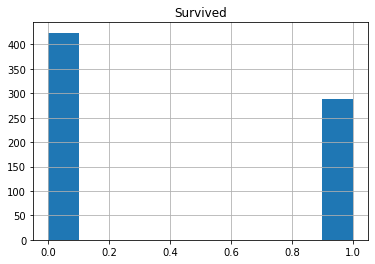

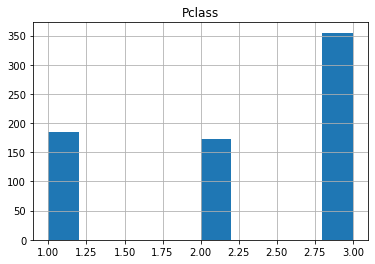

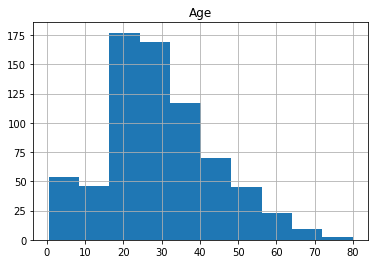

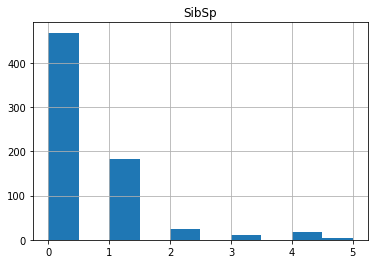

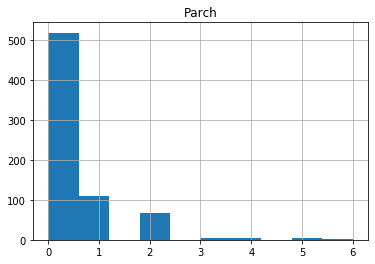

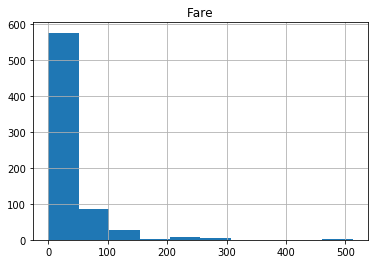

In [119]:
drawhist(train)


In [134]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [135]:
xlab = 'Age'
ylab = 'Ticket'

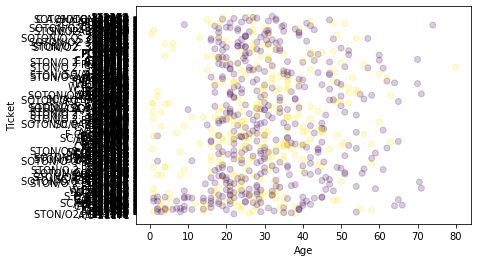

In [139]:
plt.scatter(data=train
            , x = xlab
            , y = ylab
           , c = 'Survived'
           , alpha = 0.2)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.show()

In [142]:

df = train
fig = px.scatter_matrix(df,
    color ="Survived")
fig.show()

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [ ]:
dropobjects = ['Sex', 'Ticket', 'Embarked']

In [182]:
train.drop(columns = dropobjects, inplace = True)

In [183]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train.iloc[:,1:], train.iloc[:,0] , test_size = 0.20)

In [184]:
model1 = LogisticRegression()

In [185]:
model1.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
results = model1.predict(Xtest)

AttributeError: 'numpy.ndarray' object has no attribute 'summary'

In [207]:
accuracy_score(results, Ytest)

0.6853146853146853

In [273]:
confusion_matrix(results, Ytest)

array([[76, 31],
       [14, 22]])

In [323]:
def eval_metrics(model, xtest, ytrue, ypred):
    print('Precision: {}'.format(round(precision_score(y_true = Ytest, y_pred = results),2)))
    print('Recall: {}'.format(round(recall_score(y_true = Ytest, y_pred = results),2)))
    print('F1 Score: {}'.format(round(f1_score(y_true = Ytest, y_pred = results),2)))
    plot_confusion_matrix(model, X = xtest, y_true = ytrue)
    plot_roc_curve(model, X=xtest, y= ytrue)
    
    

Precision: 0.61
Recall: 0.42
F1 Score: 0.49


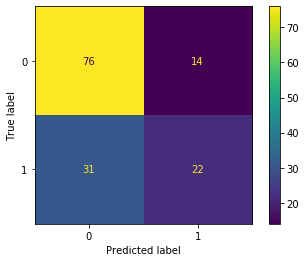

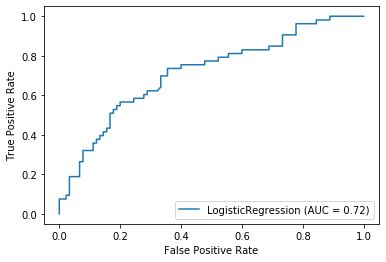

In [324]:
eval_metrics(model1, Xtest, Ytest, results)

In [209]:
print(classification_report(results, Ytest))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       107
           1       0.42      0.61      0.49        36

    accuracy                           0.69       143
   macro avg       0.63      0.66      0.63       143
weighted avg       0.74      0.69      0.70       143



In [211]:
roc_curve(results, Ytest)

(array([0.        , 0.28971963, 1.        ]),
 array([0.        , 0.61111111, 1.        ]),
 array([2, 1, 0]))

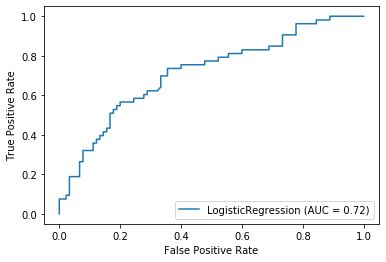

In [269]:
print( plot_roc_curve(model1, X=Xtest, y= Ytest))